In [1]:
# Loading libraries
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
%matplotlib inline

In [2]:
# Load and combine datasets
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [3]:
data = pd.concat([train, test])

In [4]:
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [5]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [6]:
data[data['Item_Visibility'].isnull()] = data['Item_Visibility'].mean()

In [7]:
# Remove dependent and identifier variables
clean_data = data.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'], axis = 1)

In [8]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 9 columns):
Item_Fat_Content             14204 non-null object
Item_MRP                     14204 non-null float64
Item_Type                    14204 non-null object
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null float64
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), object(5)
memory usage: 1.1+ MB


In [9]:
clean_data = pd.get_dummies(clean_data, columns=['Item_Fat_Content', 'Item_Type','Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type' ,'Outlet_Type'])

In [10]:
clean_data.head()

,Item_MRP,Item_Visibility,Item_Weight,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,0.016047,9.30,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,48.2692,0.019278,5.92,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,141.6180,0.016760,17.50,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,182.0950,0.000000,19.20,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,53.8614,0.000000,8.93,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [11]:
# Convert it to numpy arrays
X = clean_data.values

In [12]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 43 columns):
Item_MRP                            14204 non-null float64
Item_Visibility                     14204 non-null float64
Item_Weight                         14204 non-null float64
Item_Fat_Content_LF                 14204 non-null uint8
Item_Fat_Content_Low Fat            14204 non-null uint8
Item_Fat_Content_Regular            14204 non-null uint8
Item_Fat_Content_low fat            14204 non-null uint8
Item_Fat_Content_reg                14204 non-null uint8
Item_Type_Baking Goods              14204 non-null uint8
Item_Type_Breads                    14204 non-null uint8
Item_Type_Breakfast                 14204 non-null uint8
Item_Type_Canned                    14204 non-null uint8
Item_Type_Dairy                     14204 non-null uint8
Item_Type_Frozen Foods              14204 non-null uint8
Item_Type_Fruits and Vegetables     14204 non-null uint8
Item_Type_Hard Drinks          

In [13]:
# Scaling the values
X = scale(X)

In [16]:
pca = PCA(n_components=43)

In [17]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=43, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
var = pca.explained_variance_ratio_

In [20]:
var.shape

(43,)

In [21]:
var_cum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [23]:
print(var_cum)

[  10.29   17.19   23.09   28.68   33.79   38.47   42.48   45.28   48.07
   50.79   53.41   56.03   58.64   61.21   63.76   66.31   68.84   71.34
   73.79   76.22   78.62   81.02   83.4    85.75   88.07   90.38   92.54
   94.65   96.71   98.4   100.02  100.02  100.02  100.02  100.02  100.02
  100.02  100.02  100.02  100.02  100.02  100.02  100.02]


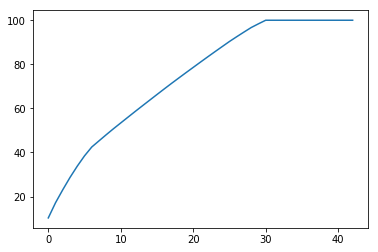

In [24]:
plt.plot(var_cum)

In [30]:
X.shape

(14204, 43)

In [25]:
pca = PCA(n_components=30)

In [26]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
X_transformed = pca.fit_transform(X)

In [29]:
X_transformed.shape

(14204, 30)

# Points to Remember

In [32]:
# PCA is used to overcome features redundancy in a data set.
# These features are low dimensional in nature.
# These features a.k.a components are a resultant of normalized linear combination of original predictor variables.
# These components aim to capture as much information as possible with high explained variance.
# The first component has the highest variance followed by second, third and so on.
# The components must be uncorrelated (remember orthogonal direction ? ). See above.
# Normalizing data becomes extremely important when the predictors are measured in different units.
# PCA works best on data set having 3 or higher dimensions. Because, with higher dimensions, it becomes increasingly difficult to make interpretations from the resultant cloud of data.
# PCA is applied on a data set with numeric variables.
# PCA is a tool which helps to produce better visualizations of high dimensional data.